In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("../Data_Output/Final_Feature_Engineered_Data.csv")
df.head()


,Date,PV_Generation_kW,Grid_Import_kW,GasEngine_Generation_kW,FuelCell_Generation_kW,Electric_Load_A_kW,Cooling_Load_A_kW,Heating_Load_A_kW,HotWater_Load_A_kW,Solar_Irradiation_W,...,DayOfWeek_cos,Wind_Direction_sin,Wind_Direction_cos,HDD,CDD,Temp_Stress_x_Hour,Is_Solar_Active,Lag_24h_Load,EWMA_24h_Load,Is_Holiday
0,2001-06-02 00:00:00,0.0,220.0,0.0,194.0,414.0,0.0,0.0,20.0,0.0,...,-0.222521,-0.669131,-0.743145,0.0,1.5,0.0,0,886.0,1255.499994,0
1,2001-06-02 01:00:00,0.0,193.0,0.0,174.0,367.0,0.0,0.0,21.0,0.0,...,-0.222521,-0.484810,-0.874620,0.0,0.6,0.6,0,896.0,1216.442657,0
2,2001-06-02 02:00:00,0.0,189.0,0.0,162.0,351.0,0.0,0.0,21.0,0.0,...,-0.222521,-0.515038,-0.857167,0.0,0.4,0.8,0,834.0,1172.860823,0
3,2001-06-02 03:00:00,0.0,182.0,0.0,151.0,333.0,0.0,0.0,22.0,0.0,...,-0.222521,-0.469472,-0.882948,0.0,0.4,1.2,0,852.0,1130.760383,0
4,2001-06-02 04:00:00,0.0,184.0,0.0,151.0,335.0,0.0,0.0,22.0,0.0,...,-0.222521,-0.422618,-0.906308,0.0,0.5,2.0,0,858.0,1089.592848,0


In [2]:
df.shape


(187728, 34)

In [3]:
df.columns


Index(['Date', 'PV_Generation_kW', 'Grid_Import_kW', 'GasEngine_Generation_kW',
       'FuelCell_Generation_kW', 'Electric_Load_A_kW', 'Cooling_Load_A_kW',
       'Heating_Load_A_kW', 'HotWater_Load_A_kW', 'Solar_Irradiation_W',
       'Outdoor_Air_Temp_C', 'Outdoor_Air_Humidity_percent', 'Wind_Speed_ms',
       'Wind_Direction_deg', 'Electric_Load_B_kW', 'Gas1_Input_GJh',
       'Gas2_Input_GJh', 'FuelCell1_Input_GJh', 'FuelCell2_Input_GJh',
       'FuelCell3_Input_GJh', 'TARGET_Total_Electric_Load_kW', 'Hour_sin',
       'Hour_cos', 'DayOfWeek_sin', 'DayOfWeek_cos', 'Wind_Direction_sin',
       'Wind_Direction_cos', 'HDD', 'CDD', 'Temp_Stress_x_Hour',
       'Is_Solar_Active', 'Lag_24h_Load', 'EWMA_24h_Load', 'Is_Holiday'],
      dtype='object')

In [4]:
df.dtypes

Date                              object
PV_Generation_kW                 float64
Grid_Import_kW                   float64
GasEngine_Generation_kW          float64
FuelCell_Generation_kW           float64
Electric_Load_A_kW               float64
Cooling_Load_A_kW                float64
Heating_Load_A_kW                float64
HotWater_Load_A_kW               float64
Solar_Irradiation_W              float64
Outdoor_Air_Temp_C               float64
Outdoor_Air_Humidity_percent     float64
Wind_Speed_ms                    float64
Wind_Direction_deg               float64
Electric_Load_B_kW               float64
Gas1_Input_GJh                   float64
Gas2_Input_GJh                   float64
FuelCell1_Input_GJh              float64
FuelCell2_Input_GJh              float64
FuelCell3_Input_GJh              float64
TARGET_Total_Electric_Load_kW    float64
Hour_sin                         float64
Hour_cos                         float64
DayOfWeek_sin                    float64
DayOfWeek_cos   

In [5]:
df.isnull().sum()

Date                             0
PV_Generation_kW                 0
Grid_Import_kW                   0
GasEngine_Generation_kW          0
FuelCell_Generation_kW           0
Electric_Load_A_kW               0
Cooling_Load_A_kW                0
Heating_Load_A_kW                0
HotWater_Load_A_kW               0
Solar_Irradiation_W              0
Outdoor_Air_Temp_C               0
Outdoor_Air_Humidity_percent     0
Wind_Speed_ms                    0
Wind_Direction_deg               0
Electric_Load_B_kW               0
Gas1_Input_GJh                   0
Gas2_Input_GJh                   0
FuelCell1_Input_GJh              0
FuelCell2_Input_GJh              0
FuelCell3_Input_GJh              0
TARGET_Total_Electric_Load_kW    0
Hour_sin                         0
Hour_cos                         0
DayOfWeek_sin                    0
DayOfWeek_cos                    0
Wind_Direction_sin               0
Wind_Direction_cos               0
HDD                              0
CDD                 

In [6]:
df.duplicated().any()

False

- This code block cleans and prepares the "Date" column for time-based analysis. First, it converts all entries to proper datetime format using pd.to_datetime(), coercing any invalid values to NaT so they do not break the pipeline. 
- Then it sorts the DataFrame chronologically and sets "Date" as the index, which is essential for time series operations like resampling, rolling averages, or slicing by date. 
- This setup ensures clean, ordered, and indexable temporal data — a foundational step before any time-aware logic kicks in.


In [7]:
# Handling the Date Column

df["Date"] = pd.to_datetime(df["Date"], errors='coerce')
df = df.sort_values("Date").set_index("Date")

This line adds a lag feature by shifting the "TARGET_Total_Electric_Load_kW" column down by one time step, creating a new column "Lag_1h_Load" that holds the previous hour’s load value. It is a powerful way to inject temporal memory into the model, helping it learn patterns.


In [8]:
#  Adding Lag Features
df["Lag_1h_Load"] = df["TARGET_Total_Electric_Load_kW"].shift(1)

- This block adds rolling window features to capture short-term and long-term trends in electric load.
-  It computes the 3-hour rolling mean and standard deviation, plus a 24-hour rolling mean — all shifted by one time step to prevent data leakage.
-  These features help the model understand recent volatility and load patterns without peeking into the future, which is crucial for honest forecasting.

In [9]:
# Adding the Rolling Window Features

df["Rolling_Mean_3h"] = df["TARGET_Total_Electric_Load_kW"].rolling(window=3).mean().shift(1)
df["Rolling_Std_3h"] = df["TARGET_Total_Electric_Load_kW"].rolling(window=3).std().shift(1)
df["Rolling_Mean_24h"] = df["TARGET_Total_Electric_Load_kW"].rolling(window=24).mean().shift(1)

This block extracts calendar and seasonal signals from the datetime index to help the model learn time-aware patterns. "month" and "dayofyear" capture cyclical trends like seasonal demand shifts, while "is_weekend" flags behavioral shifts in load during weekends. These features inject temporal context without relying on raw timestamps making the data more interpretable and model-friendly.


In [10]:
# Calendar & Seasonal Features
df["month"] = df.index.month
df["dayofyear"] = df.index.dayofyear
df["is_weekend"] = df.index.dayofweek.isin([5, 6]).astype(int)

This block assigns a seasonal label to each row based on the month, then maps those labels to integers for model compatibility. It first defines a simple get_season() function to categorize months into "winter", "spring", "summer", or "fall". Then it applies this logic to the "month" column and converts the result into numeric codes. This gives the model a compact, interpretable signal about seasonal context useful for capturing cyclical demand patterns.


In [11]:
# Season 
def get_season(month):
    if month in [12, 1, 2]:
        return "winter"
    elif month in [3, 4, 5]:
        return "spring"
    elif month in [6, 7, 8]:
        return "summer"
    else:
        return "fall"

df["season"] = df["month"].apply(get_season)
df["season"] = df["season"].map({"winter":1, "spring":2, "summer":3, "fall":4})

This code block flags whether each timestamp falls within peak hours -  7–10am and 5–9pm — by extracting the hour from the datetime index and applying a logical mask. The result is stored in "is_peak_hour" as a binary feature (1 for peak, 0 for off-peak). This helps the model capture behavioral or operational spikes in load during high-demand windows, which are often driven by human routines or business cycles.


In [12]:
# Peak Hour Feature (7am–10am & 5pm–9pm)
hour = df.index.hour
df["is_peak_hour"] = ((hour >= 7) & (hour <= 10) | (hour >= 17) & (hour <= 21)).astype(int)

In [13]:
df.head()

,PV_Generation_kW,Grid_Import_kW,GasEngine_Generation_kW,FuelCell_Generation_kW,Electric_Load_A_kW,Cooling_Load_A_kW,Heating_Load_A_kW,HotWater_Load_A_kW,Solar_Irradiation_W,Outdoor_Air_Temp_C,...,Is_Holiday,Lag_1h_Load,Rolling_Mean_3h,Rolling_Std_3h,Rolling_Mean_24h,month,dayofyear,is_weekend,season,is_peak_hour
Date,,,,,,,,,,,,,,,,,,,,,
2001-06-02 00:00:00,0.0,220.0,0.0,194.0,414.0,0.0,0.0,20.0,0.0,19.5,...,0,NaN,NaN,NaN,NaN,6,153,1,3,0
2001-06-02 01:00:00,0.0,193.0,0.0,174.0,367.0,0.0,0.0,21.0,0.0,18.6,...,0,828.0,NaN,NaN,NaN,6,153,1,3,0
2001-06-02 02:00:00,0.0,189.0,0.0,162.0,351.0,0.0,0.0,21.0,0.0,18.4,...,0,734.0,NaN,NaN,NaN,6,153,1,3,0
2001-06-02 03:00:00,0.0,182.0,0.0,151.0,333.0,0.0,0.0,22.0,0.0,18.4,...,0,702.0,754.666667,65.493002,NaN,6,153,1,3,0
2001-06-02 04:00:00,0.0,184.0,0.0,151.0,335.0,0.0,0.0,22.0,0.0,18.5,...,0,666.0,700.666667,34.019602,NaN,6,153,1,3,0


In [14]:
# Composite Weather Index

df["Weather_Stress_Index"] = (
    df["Outdoor_Air_Temp_C"] * df["Outdoor_Air_Humidity_percent"] * (df["Wind_Speed_ms"]+1)
)

In [15]:
df = df.dropna()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187704 entries, 2001-06-03 00:00:00 to 2022-10-31 23:00:00
Data columns (total 43 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   PV_Generation_kW               187704 non-null  float64
 1   Grid_Import_kW                 187704 non-null  float64
 2   GasEngine_Generation_kW        187704 non-null  float64
 3   FuelCell_Generation_kW         187704 non-null  float64
 4   Electric_Load_A_kW             187704 non-null  float64
 5   Cooling_Load_A_kW              187704 non-null  float64
 6   Heating_Load_A_kW              187704 non-null  float64
 7   HotWater_Load_A_kW             187704 non-null  float64
 8   Solar_Irradiation_W            187704 non-null  float64
 9   Outdoor_Air_Temp_C             187704 non-null  float64
 10  Outdoor_Air_Humidity_percent   187704 non-null  float64
 11  Wind_Speed_ms                  187704 non-null  float64
 

In [17]:
print(df.columns.tolist())

['PV_Generation_kW', 'Grid_Import_kW', 'GasEngine_Generation_kW', 'FuelCell_Generation_kW', 'Electric_Load_A_kW', 'Cooling_Load_A_kW', 'Heating_Load_A_kW', 'HotWater_Load_A_kW', 'Solar_Irradiation_W', 'Outdoor_Air_Temp_C', 'Outdoor_Air_Humidity_percent', 'Wind_Speed_ms', 'Wind_Direction_deg', 'Electric_Load_B_kW', 'Gas1_Input_GJh', 'Gas2_Input_GJh', 'FuelCell1_Input_GJh', 'FuelCell2_Input_GJh', 'FuelCell3_Input_GJh', 'TARGET_Total_Electric_Load_kW', 'Hour_sin', 'Hour_cos', 'DayOfWeek_sin', 'DayOfWeek_cos', 'Wind_Direction_sin', 'Wind_Direction_cos', 'HDD', 'CDD', 'Temp_Stress_x_Hour', 'Is_Solar_Active', 'Lag_24h_Load', 'EWMA_24h_Load', 'Is_Holiday', 'Lag_1h_Load', 'Rolling_Mean_3h', 'Rolling_Std_3h', 'Rolling_Mean_24h', 'month', 'dayofyear', 'is_weekend', 'season', 'is_peak_hour', 'Weather_Stress_Index']


Before building my final forecasting model, I first cleaned and prepared the dataset to avoid any leakage and ensure proper time-series structure. I sorted the dataframe by its time index to maintain chronological order, then identified and removed the leakage column y_future, which contained shifted future values that would cause unrealistically high accuracy if left in the feature set. After dropping this column, I redefined my features (X) and target variable (y) cleanly based on the corrected dataframe and performed a quick sanity check to confirm no leakage remained. This created a clean, reliable dataset that I could safely use to train my final, valid energy-demand prediction model.

In [36]:
# Making sure df is sorted by time index already
df = df.sort_index()

target_col = "TARGET_Total_Electric_Load_kW"

# DROP leakage column
df_model = df.drop(columns=["y_future"], errors="ignore")

# Features and target
X = df_model.drop(columns=[target_col])
y = df_model[target_col]

print(X.shape, y.shape)
print("Leakage columns present?", set(["y_future"]).intersection(X.columns))


(187703, 40) (187703,)
Leakage columns present? set()


In this step, I split the dataset into training and testing sets using an 80/20 time-based split. Since this is a time series problem, I avoided using a random split and instead manually separated the first 80% of the data for training and kept the most recent 20% for testing. This ensures that the model learns from past patterns and is evaluated on future unseen data

In [37]:
split_index = int(len(df_model) * 0.8)

X_train = X.iloc[:split_index]
X_test  = X.iloc[split_index:]

y_train = y.iloc[:split_index]
y_test  = y.iloc[split_index:]


In this step, I trained my final forecasting model using a Random Forest Regressor. I chose Random Forest because it handles nonlinear relationships well and performs strongly on complex energy datasets without requiring heavy feature scaling. I increased the number of trees (n_estimators=400) to improve stability and set a reasonable depth (max_depth=20) to prevent overfitting. After setting a fixed random_state for reproducibility and using all CPU cores (n_jobs=-1) for faster training, I fit the model on the training data and generated predictions on the test set.

In [38]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=400,
    max_depth=20,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)


In [43]:
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    median_absolute_error,
    r2_score,
    explained_variance_score
)
import numpy as np

# Metrics
rmse  = np.sqrt(mean_squared_error(y_test, y_pred))
mae   = mean_absolute_error(y_test, y_pred)
mape  = mean_absolute_percentage_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
r2    = r2_score(y_test, y_pred)
evs   = explained_variance_score(y_test, y_pred)

# Printing results
print("\nFull Evaluation Metrics")
print("----------------------------")
print(f"RMSE                : {rmse:.4f}")
print(f"MAE                 : {mae:.4f}")
print(f"MAPE                : {mape:.4f}")
print(f"Median AE           : {medae:.4f}")
print(f"R²                  : {r2:.4f}")
print(f"Explained Variance  : {evs:.4f}")
print("----------------------------")



Full Evaluation Metrics
----------------------------
RMSE                : 38.4369
MAE                 : 13.9553
MAPE                : 0.0093
Median AE           : 1.6736
R²                  : 0.9949
Explained Variance  : 0.9952
----------------------------


- The final model shows strong and realistic performance after removing data leakage and rebuilding the forecasting pipeline properly. The RMSE of ~38.43 kW and MAE of ~13.96 kW indicate that the model’s average prediction error is small compared to the overall load values, which often range in the thousands. 
The MAPE of 0.0093 (≈ 0.93%) shows that the model is wrong by less than 1% on average.
- The Median AE of only ~1.67 means that half of all predictions are within just 1–2 kW of the true value, showing that the model is very stable and not heavily influenced by outliers.
 - The R² score of 0.9949 and Explained Variance of 0.9952 show that the model captures almost all variability in the target variable and generalizes well on unseen data.

In [40]:
import pandas as pd

feat_imp = pd.Series(rf_model.feature_importances_, index=X.columns)\
             .sort_values(ascending=False)

print(feat_imp.head(15))


Lag_1h_Load                0.813036
Lag_24h_Load               0.107279
Grid_Import_kW             0.030961
Hour_cos                   0.015604
GasEngine_Generation_kW    0.006163
Hour_sin                   0.006161
FuelCell_Generation_kW     0.004304
DayOfWeek_sin              0.002236
Rolling_Mean_24h           0.001758
PV_Generation_kW           0.001741
is_peak_hour               0.001739
is_weekend                 0.001279
Rolling_Std_3h             0.000998
Rolling_Mean_3h            0.000826
EWMA_24h_Load              0.000757
dtype: float64


- Lag_1h_Load is the most important feature. This means the electric load from the previous hour has the strongest influence on the next hour’s prediction.

- Lag_24h_Load is the second most important feature. This captures the daily repeating pattern in energy usage.

- Grid_Import_kW also contributes to the prediction because it reflects how much energy is being pulled from the grid, which aligns with the load behavior.

- Hour_cos helps the model understand the cyclic nature of time, such as morning, peak, and nighttime patterns.

- GasEngine_Generation_kW and FuelCell_Generation_kW add smaller contributions since on-site generation affects overall electricity load.

- DayOfWeek_sin, weekend indicator, and peak hour indicator give minor improvements by helping the model understand weekly scheduling patterns.

- Rolling window features (3h and 24h mean or std) add some smoothing information but are less influential.

In [44]:
# Creating a dataframe with actual vs predicted
results_df = pd.DataFrame({
    "Actual_Load_kW": y_test.values.flatten(),
    "Predicted_Load_kW": y_pred.flatten()
})

# Show first 10 rows
results_df.head(10)

,Actual_Load_kW,Predicted_Load_kW
0,2454.0,2441.319000
1,2152.0,2158.273111
2,1936.0,1951.198002
3,1816.0,1819.535182
4,1790.0,1762.569929
5,1598.0,1594.311244
6,1402.0,1403.835064
7,1382.0,1381.984000
8,1354.0,1351.220018
9,1320.0,1315.679048


In [45]:
results_df = pd.DataFrame({
    "Actual_Load_kW": y_test.values.flatten(),
    "Predicted_Load_kW": y_pred.flatten(),
})

results_df["Absolute_Error"] = abs(results_df["Actual_Load_kW"] - results_df["Predicted_Load_kW"])
results_df["Percentage_Error"] = (
    results_df["Absolute_Error"] / results_df["Actual_Load_kW"]
)

results_df.head(10)


,Actual_Load_kW,Predicted_Load_kW,Absolute_Error,Percentage_Error
0,2454.0,2441.319000,12.681000,0.005167
1,2152.0,2158.273111,6.273111,0.002915
2,1936.0,1951.198002,15.198002,0.007850
3,1816.0,1819.535182,3.535182,0.001947
4,1790.0,1762.569929,27.430071,0.015324
5,1598.0,1594.311244,3.688756,0.002308
6,1402.0,1403.835064,1.835064,0.001309
7,1382.0,1381.984000,0.016000,0.000012
8,1354.0,1351.220018,2.779982,0.002053
9,1320.0,1315.679048,4.320952,0.003273


## XGBoost Regressor Model

In [46]:
!pip install xgboost


In [47]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import numpy as np
import pandas as pd

# Train XGBoost
xgb_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [48]:
# Predict
y_pred_xgb = xgb_model.predict(X_test)

In [49]:
# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae = mean_absolute_error(y_test, y_pred_xgb)
mape = mean_absolute_percentage_error(y_test, y_pred_xgb)
r2 = r2_score(y_test, y_pred_xgb)

print("XGBoost Evaluation Metrics")
print("-------------------------------")
print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)
print("R2:", r2)

XGBoost Evaluation Metrics
-------------------------------
RMSE: 20.19450282123812
MAE: 10.804044864398778
MAPE: 0.007419202848017644
R2: 0.9985817489759964


In [50]:

# Predictions as dataframe
df_xgb = pd.DataFrame({
    "Actual": y_test.values.flatten(),
    "Predicted": y_pred_xgb.flatten()
})
df_xgb.head(10)

,Actual,Predicted
0,2454.0,2391.458008
1,2152.0,2179.141602
2,1936.0,1945.853882
3,1816.0,1819.027344
4,1790.0,1756.917725
5,1598.0,1592.773560
6,1402.0,1397.244019
7,1382.0,1394.322266
8,1354.0,1354.316284
9,1320.0,1317.820679


XGBoost Feature Importance
Lag_1h_Load                0.429719
Lag_24h_Load               0.099586
Rolling_Mean_3h            0.095341
Grid_Import_kW             0.078576
GasEngine_Generation_kW    0.065244
is_weekend                 0.062232
Hour_cos                   0.050758
is_peak_hour               0.026226
FuelCell_Generation_kW     0.023109
DayOfWeek_sin              0.015284
Hour_sin                   0.013360
DayOfWeek_cos              0.007544
Rolling_Mean_24h           0.006922
Rolling_Std_3h             0.004026
PV_Generation_kW           0.003573
FuelCell2_Input_GJh        0.002803
FuelCell1_Input_GJh        0.002573
Gas2_Input_GJh             0.001890
EWMA_24h_Load              0.001810
Gas1_Input_GJh             0.001371
dtype: float32


<Figure size 1000x800 with 0 Axes>

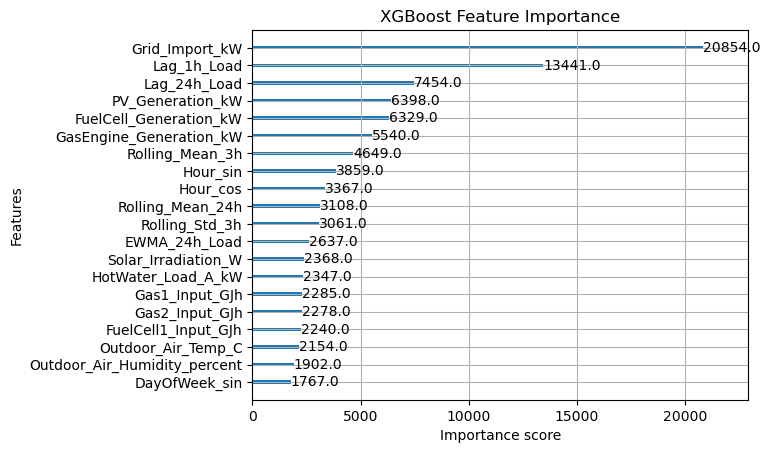

In [68]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
import pandas as pd
# Get importance
xgb_feat_imp = pd.Series(
    xgb_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

print("XGBoost Feature Importance")
print(xgb_feat_imp.head(20))

#Plotting
plt.figure(figsize=(10, 8))
plot_importance(xgb_model, max_num_features=20)
plt.title("XGBoost Feature Importance")
plt.show()

### Linear Regression Model

In [51]:
from sklearn.linear_model import LinearRegression

# Train
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

In [52]:

# Predict
y_pred_lr = lr_model.predict(X_test)


In [53]:
# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae = mean_absolute_error(y_test, y_pred_lr)
mape = mean_absolute_percentage_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

print("Linear Regression Evaluation Metrics")
print("--------------------------------------")
print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)
print("R2:", r2)

Linear Regression Evaluation Metrics
--------------------------------------
RMSE: 0.0676092336071356
MAE: 0.05181428495126977
MAPE: 3.964769766670619e-05
R2: 0.9999999841035994


In [54]:
# Predictions
df_lr = pd.DataFrame({
    "Actual": y_test.values.flatten(),
    "Predicted": y_pred_lr.flatten()
})
df_lr.head(10)

,Actual,Predicted
0,2454.0,2453.960631
1,2152.0,2151.921190
2,1936.0,1935.920718
3,1816.0,1815.912269
4,1790.0,1789.917886
5,1598.0,1597.961742
6,1402.0,1401.924913
7,1382.0,1381.918776
8,1354.0,1353.946234
9,1320.0,1319.954085


In [69]:
import numpy as np
import pandas as pd

lr_coef = np.abs(lr_model.coef_)

lr_feat_imp = pd.Series(
    lr_coef,
    index=X.columns
).sort_values(ascending=False)

print("Linear Regression (Coefficient-based Importance)")
print(lr_feat_imp.head(20))


Linear Regression (Coefficient-based Importance)
GasEngine_Generation_kW    1.999972
Grid_Import_kW             1.999618
FuelCell_Generation_kW     1.999499
PV_Generation_kW           1.997632
FuelCell3_Input_GJh        0.798124
Gas1_Input_GJh             0.136843
FuelCell1_Input_GJh        0.065487
Is_Solar_Active            0.046645
Hour_sin                   0.026559
DayOfWeek_sin              0.024391
is_peak_hour               0.021085
Wind_Direction_sin         0.015796
FuelCell2_Input_GJh        0.014038
month                      0.013484
Wind_Speed_ms              0.012197
Wind_Direction_cos         0.010752
is_weekend                 0.006832
Is_Holiday                 0.005134
season                     0.004854
CDD                        0.004408
dtype: float64


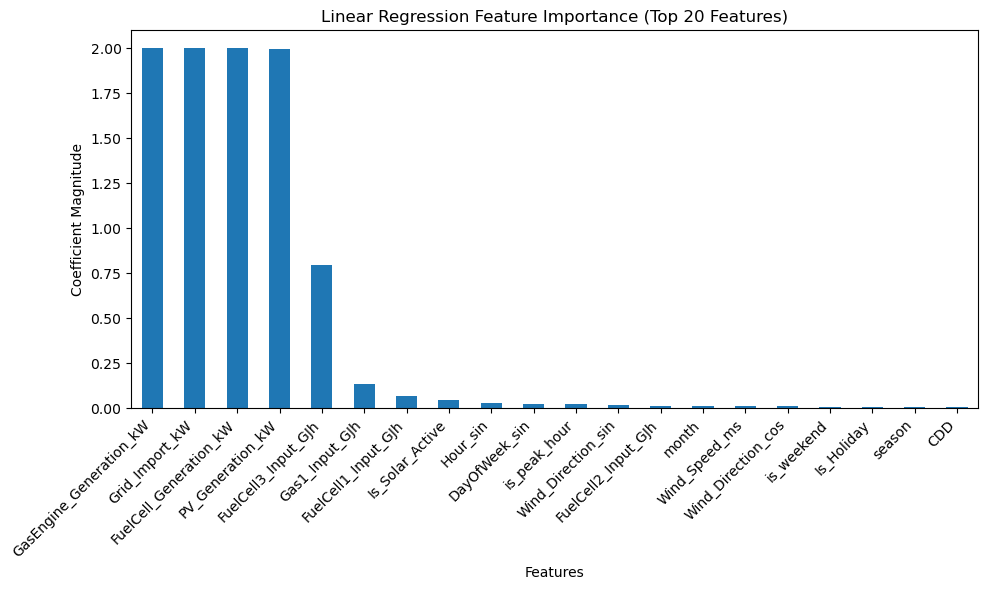

In [70]:
# Plot Feature Importance
plt.figure(figsize=(10, 6))
lr_feat_imp.head(20).plot(kind='bar')
plt.title("Linear Regression Feature Importance (Top 20 Features)")
plt.ylabel("Coefficient Magnitude")
plt.xlabel("Features")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### LSTM Model

In [55]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [56]:
X_train_lstm = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_lstm  = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])


In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, GRU

lstm_model = Sequential()
lstm_model.add(LSTM(64, return_sequences=False, input_shape=(1, X_train.shape[1])))
lstm_model.add(Dense(32, activation="relu"))
lstm_model.add(Dense(1))

lstm_model.compile(optimizer="adam", loss="mse")
lstm_model.summary()

# Train
history = lstm_model.fit(
    X_train_lstm, y_train,
    epochs=15,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

c:\Users\knowl\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        26,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,993 (113.25 KB)

 Trainable params: 28,993 (113.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
4224/4224 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 951832.5625 - val_loss: 3175.9170
Epoch 2/15
4224/4224 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 2152.7222 - val_loss: 212.3991
Epoch 3/15
4224/4224 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 175.6988 - val_loss: 65.9222
Epoch 4/15
4224/4224 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 53.2426 - val_loss: 28.1012
Epoch 5/15
4224/4224 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 32.0934 - val_loss: 20.6088
Epoch 6/15
4224/4224 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 23.0776 - val_loss: 12.3663
Epoch 7/15
4224/4224 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 23.6710 - val_loss: 11.9290
Epoch 8/15
4224/4224 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 17.3237 - val_loss: 21.9392
Epoch 9/15
4224/4224 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 14.5723 - val_loss: 12.7477
Epoch 10/15
4224/4224 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 15.5661 - val_loss: 12.1062
Epoch 11/15
4224/4224 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 16.0895 - val_loss: 11.29

In [58]:
# Predict
y_pred_lstm = lstm_model.predict(X_test_lstm).flatten()

1174/1174 ━━━━━━━━━━━━━━━━━━━━ 1s 811us/step


In [59]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lstm))
mae = mean_absolute_error(y_test, y_pred_lstm)
mape = mean_absolute_percentage_error(y_test, y_pred_lstm)
r2 = r2_score(y_test, y_pred_lstm)

print("LSTM Model Evaluation Metrics")
print("--------------------------------")
print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)
print("R2:", r2)

# Predictions dataframe
df_lstm = pd.DataFrame({
    "Actual": y_test.values.flatten(),
    "Predicted": y_pred_lstm.flatten()
})
df_lstm.head(10)


LSTM Model Evaluation Metrics
--------------------------------
RMSE: 2.2042349144532434
MAE: 1.4521640308028847
MAPE: 0.0011064422648164164
R2: 0.999983103275259


,Actual,Predicted
0,2454.0,2451.063477
1,2152.0,2147.882812
2,1936.0,1931.164551
3,1816.0,1813.770264
4,1790.0,1789.201172
5,1598.0,1598.928955
6,1402.0,1400.426392
7,1382.0,1380.849365
8,1354.0,1353.772339
9,1320.0,1320.134155


### GRU Model 

In [61]:
gru_model = Sequential()
gru_model.add(GRU(64, return_sequences=False, input_shape=(1, X_train.shape[1])))
gru_model.add(Dense(32, activation="relu"))
gru_model.add(Dense(1))

gru_model.compile(optimizer="adam", loss="mse")
gru_model.summary()

# Train
history_gru = gru_model.fit(
    X_train_lstm, y_train,
    epochs=15,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

c:\Users\knowl\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 64)             │        20,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,465 (87.75 KB)

 Trainable params: 22,465 (87.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
4224/4224 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 859597.6250 - val_loss: 2710.9734
Epoch 2/15
4224/4224 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 1809.2642 - val_loss: 130.0287
Epoch 3/15
4224/4224 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 145.7226 - val_loss: 50.5653
Epoch 4/15
4224/4224 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 48.8658 - val_loss: 41.7145
Epoch 5/15
4224/4224 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 28.3042 - val_loss: 12.1600
Epoch 6/15
4224/4224 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 22.1477 - val_loss: 10.6087
Epoch 7/15
4224/4224 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 19.4593 - val_loss: 20.7249
Epoch 8/15
4224/4224 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 15.8484 - val_loss: 8.9090
Epoch 9/15
4224/4224 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - loss: 13.1528 - val_loss: 4.8417
Epoch 10/15
4224/4224 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - loss: 12.2549 - val_loss: 6.3072
Epoch 11/15
4224/4224 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - loss: 10.7201 - val_loss: 4.56

In [62]:
# Predict
y_pred_gru = gru_model.predict(X_test_lstm).flatten()

1174/1174 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step


In [64]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
import numpy as np


rmse = np.sqrt(mean_squared_error(y_test, y_pred_gru))
mae = mean_absolute_error(y_test, y_pred_gru)
mape = mean_absolute_percentage_error(y_test, y_pred_gru)
r2 = r2_score(y_test, y_pred_gru)

print("GRU Model Evaluation Metrics")
print("----------------------------------")
print("RMSE :", rmse)
print("MAE  :", mae)
print("MAPE :", mape)
print("R2   :", r2)


GRU Model Evaluation Metrics
----------------------------------
RMSE : 2.5966668861143063
MAE  : 1.920026260790156
MAPE : 0.0014246653519991688
R2   : 0.9999765512738827


In [65]:
import pandas as pd

df_pred_gru = pd.DataFrame({
    "y_test": y_test[:10].values,
    "y_pred_gru": y_pred_gru[:10]
})

df_pred_gru


,y_test,y_pred_gru
0,2454.0,2453.359863
1,2152.0,2149.332031
2,1936.0,1935.390991
3,1816.0,1815.684570
4,1790.0,1791.429321
5,1598.0,1599.042236
6,1402.0,1402.450928
7,1382.0,1382.247559
8,1354.0,1354.405640
9,1320.0,1320.154785
